In [1]:
# Import needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.metrics import confusion_matrix 
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.preprocessing import MinMaxScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [2]:
# Import the data
df_original = pd.read_csv(r'/Users/ibby/Desktop/frauddata.csv')

In [3]:
# Make a copy of the dataset, and make edits on that
df = df_original.copy()

In [4]:
# Check the head to see if everything looks good
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Newer updated Conf Matrix Function
def ibbys_cm(y, y_hat, title='Confusion Matrix'):
    # label the axis
    labels = ['Arrest', 'Not Arrest']
    precision = precision_score(y, y_hat, average = 'weighted')
    recall = recall_score(y, y_hat, average = 'weighted')
    accuracy = accuracy_score(y,y_hat)
    cm = np.round(confusion_matrix(y, y_hat)/len(y), 2)
    cm = sns.heatmap(cm, annot = True, cmap='Blues', fmt=".2%");
    plt.xlabel('Actual');
    plt.ylabel('Predicted');
    cm.set_xticklabels(labels);
    cm.set_yticklabels(labels);
    plt.title('Confusion Matrix');
    plt.show()
    print(f'Accuracy score is :{accuracy}')
    print(f'Recall score is :{recall}')

# Data Preprocessing

In [6]:
# Standardize the data

df_clean = df.copy()

scaler = StandardScaler()
df_clean['std_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Amount', 'Time'], axis=1, inplace=True)

In [7]:
# Instantiate y to the target variable
# Instantiate x to be the features of the dataset
# Drop any unneeded features

X = df_clean.drop('Class', axis=1)

y = df_clean['Class']

# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
# create a validation set. 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2, random_state=2)

# Vanilla Model

# Random Forest

In [9]:
%%time

rndf = RandomForestClassifier()

rndf.fit(X_train,y_train)

CPU times: user 1min 53s, sys: 178 ms, total: 1min 53s
Wall time: 1min 53s


RandomForestClassifier()

In [10]:
y_test_preds = rndf.predict(X_test)
rf_acc = accuracy_score(y_test, y_test_preds)
rf_prec = precision_score(y_test, y_test_preds)
rf_rec = recall_score(y_test, y_test_preds)


In [11]:
print(f'The accuarcy  score is {rf_acc}')
print(f'The precision score is {rf_prec}')
print(f'The recall score is {rf_rec}')

The accuarcy  score is 0.9995786664794073
The precision score is 0.9743589743589743
The recall score is 0.7755102040816326


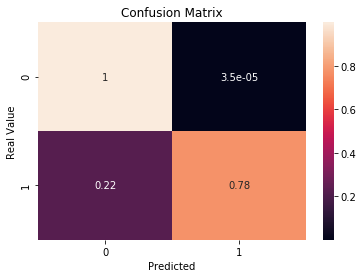

In [12]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_test_preds, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

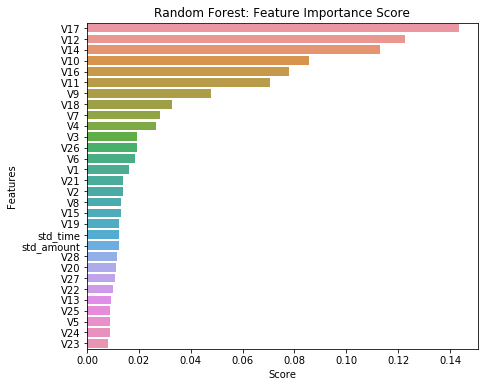

In [13]:
rndf_feat_imp = pd.DataFrame(rndf.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=rndf_feat_imp.index,x=rndf_feat_imp[0],orient='h');
plt.title('Random Forest: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

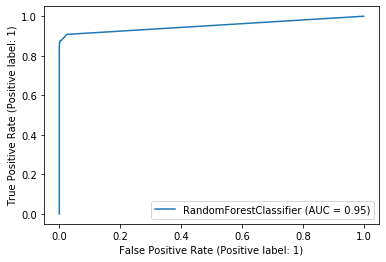

In [14]:
metrics.plot_roc_curve(rndf, X_test, y_test)  
plt.show() 

# Random Forest

In [15]:
%%time
clf = RandomForestClassifier(criterion = 'entropy',
                            max_depth = 5,
                            n_estimators=20)


# Fit the model to the training data
clf.fit(X_train, y_train)

# use the model to predict test accuracy

y_hat_test = clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_hat_test)
rf_prec = precision_score(y_test, y_hat_test)
rf_rec = recall_score(y_test, y_hat_test)




CPU times: user 8.77 s, sys: 27.4 ms, total: 8.8 s
Wall time: 8.8 s


In [16]:
print(f'The accuarcy  score is {rf_acc}')
print(f'The precision score is {rf_prec}')
print(f'The recall score is {rf_rec}')

The accuarcy  score is 0.999420666409185
The precision score is 0.9012345679012346
The recall score is 0.7448979591836735


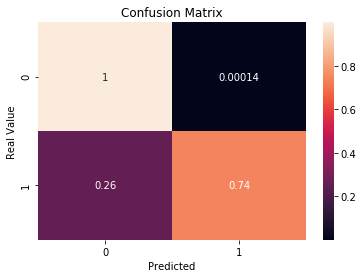

In [17]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_hat_test, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

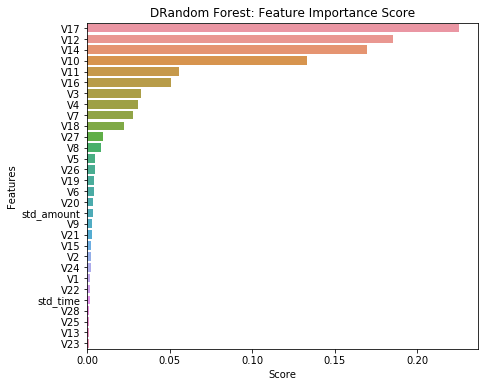

In [18]:
clf_feat_imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=clf_feat_imp.index,x=clf_feat_imp[0],orient='h');
plt.title('DRandom Forest: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

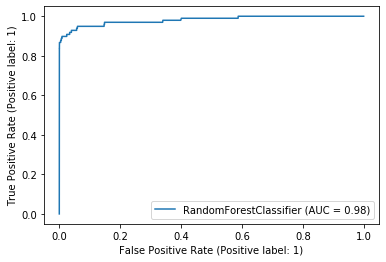

In [19]:
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show() 

# Decision Tree Classifier

In [20]:
dt_clf = DecisionTreeClassifier(random_state=42, criterion='entropy')

In [21]:
%%time
dt_clf.fit(X_train, y_train)

CPU times: user 6.56 s, sys: 10.8 ms, total: 6.57 s
Wall time: 6.57 s


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [22]:
dt_y_test_preds = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_test_preds)
dt_prec = precision_score(y_test, dt_y_test_preds)
dt_rec = recall_score(y_test, dt_y_test_preds)

print(f'The accuarcy  score is {dt_acc}')
print(f'The precision score is {dt_prec}')
print(f'The recall score is {dt_rec}')


The accuarcy  score is 0.9992099996488887
The precision score is 0.7572815533980582
The recall score is 0.7959183673469388


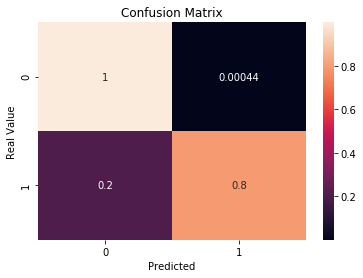

In [23]:
# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, dt_y_test_preds, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

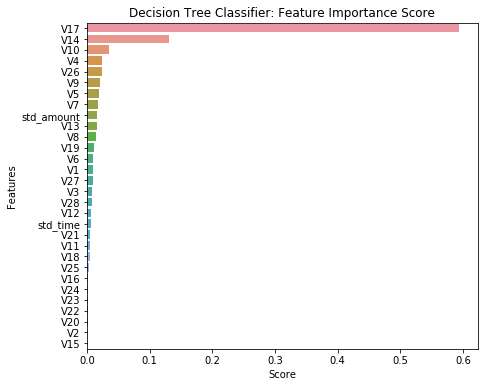

In [24]:
dt_feat_imp = pd.DataFrame(dt_clf.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=dt_feat_imp.index,x=dt_feat_imp[0],orient='h');
plt.title('Decision Tree Classifier: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

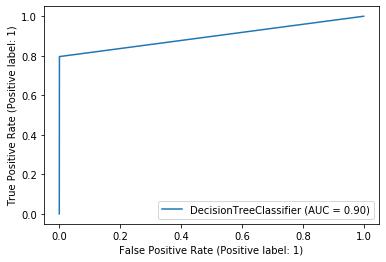

In [25]:
metrics.plot_roc_curve(dt_clf, X_test, y_test)  
plt.show() 

In [26]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# XGB Classifier

In [27]:
%%time
# create an XGBoost model
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

CPU times: user 48.7 s, sys: 168 ms, total: 48.9 s
Wall time: 48.4 s


XGBClassifier()

In [28]:
xgb_y_preds = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test,xgb_y_preds)
xgb_prec = precision_score(y_test, xgb_y_preds)
xgb_rec = recall_score(y_test, xgb_y_preds)

print(f'The accuarcy  score is {xgb_acc}')
print(f'The precision score is {xgb_prec}')
print(f'The recall score is {xgb_rec}')

The accuarcy  score is 0.9996137776061234
The precision score is 0.9523809523809523
The recall score is 0.8163265306122449


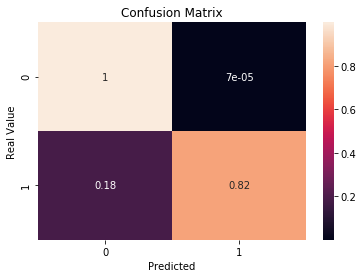

In [29]:
# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, xgb_y_preds, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

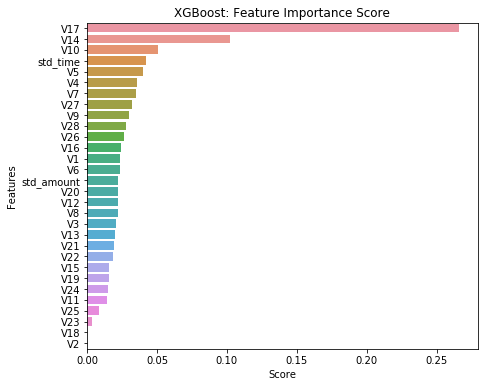

In [30]:
xgb_feat_imp = pd.DataFrame(xgb.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=xgb_feat_imp.index,x=xgb_feat_imp[0],orient='h');
plt.title('XGBoost: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

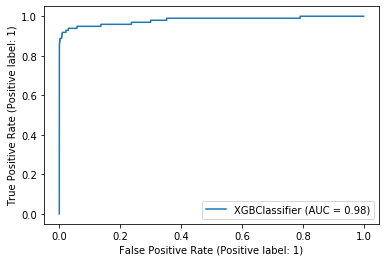

In [31]:
metrics.plot_roc_curve(xgb, X_test, y_test)  
plt.show() 

# Logistic Regression

In [32]:
%%time

model_log = LogisticRegression()
model_log.fit(X_test, y_test)
y_pred_log = model_log.predict(X_test)



log_preds = model_log.predict(X_test)
log_acc = accuracy_score(y_test,log_preds)
log_prec = precision_score(y_test, log_preds)
log_rec = recall_score(y_test, log_preds)

print(f'The accuarcy  score is {log_acc}')
print(f'The precision score is {log_prec}')
print(f'The recall score is {log_rec}')





The accuarcy  score is 0.9992099996488887
The precision score is 0.863013698630137
The recall score is 0.6428571428571429
CPU times: user 1.01 s, sys: 8.05 ms, total: 1.02 s
Wall time: 264 ms


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.64      0.74        98

    accuracy                           1.00     56962
   macro avg       0.93      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

AUC: 0.82



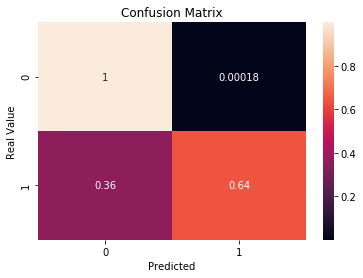

In [33]:
# classification report
print(classification_report(y_test, y_pred_log))

# ROC AUC score
print("AUC: {:.2f}\n".format(roc_auc_score(y_test, y_pred_log)))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_log, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

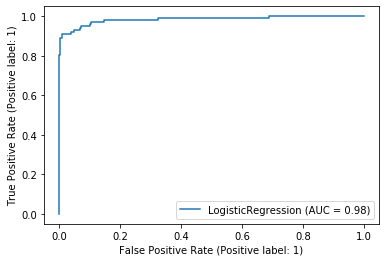

In [34]:
metrics.plot_roc_curve(model_log, X_test, y_test)  
plt.show()                                   